In [1]:
###############################################################################################################################

                                                # Import Libraries


###############################################################################################################################
import re
import pandas as pd
import numpy as np
from collections import defaultdict
from nltk import tokenize


from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from tqdm import tqdm_notebook as tqdm
from tqdm import trange


import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import re


pd.set_option('display.max_rows', 500)


In [2]:
###############################################################################################################################

                                                # Define Functions


###############################################################################################################################


def getcorpus_local(local):
    with open(str(local)+'.txt') as f:
        soup = BeautifulSoup(f, "html.parser")
        words = soup.get_text()
        #words= re.sub("[^a-zA-Z' ]+", " ", words)
        words = re.sub("\\n","",words)
        words =re.sub("\\'", "", words)
        return words

    
    
def listOfTuples(l1, l2): 
    return list(map(lambda x, y:(x,y), l1, l2))



def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')


In [438]:
###############################################################################################################################

                                                # Get text and process the data 


###############################################################################################################################

HPOne = getcorpus_local("Harry Potter and the Sorcerer")


chapternumbers = re.findall(r"(?<=CHAPTER )(\w+)", HPOne)


chapternames =     ["The Boy Who Lived",  
"The Vanishing Glass",   
"The Letters from No One", 
"The Keeper of Keys",   
"Diagon Alley",       
"The Journey from Platform Nine and Three-Quarters",     
"The Sorting Hat",   
"The Potions Master",      
"The Midnight Duel",  
"Hallowe'en", 
"Quidditch",    
"The Mirror of Erised",     
"Nicholas Flamel", 
"Norbert the Norwegian Ridgeback",     
"The Forbidden Forest",   
"Through the Trapdoor",     
"The Man with Two Faces"]

chaptertext = HPOne.split("CHAPTER")


chaptertextformatted = []
for num in list(range(len(chapternames))):
    intext =chaptertext[num+1][1:len(chapternumbers[num] + str("  ")+ chapternames[num].rstrip())+1]
    #print(intext)
    chaptertextformatted.append(chaptertext[num+1].split(intext)[1])
    
    
    
namestuple = listOfTuples(chapternames, chaptertextformatted)



chapternamelistformatted = []
for num  in list(range(len(chapternames))):
    chapternamelistformatted.append( 'CHAPTER '+ chapternumbers[num])
    
    
    
BookOne =dict(zip(chapternamelistformatted, namestuple))



chaplist = []
for chapter in BookOne:
    chaplist.append(chapter)

In [6]:
###############################################################################################################################

                                                # Sentiment analysis 


###############################################################################################################################





In [7]:
analyzer = SentimentIntensityAnalyzer()

In [8]:
for chapternum in tqdm(BookOne, desc='Progress'):
    print(chapternum)
    text =BookOne[chapternum][1]
    sentence_list = tokenize.sent_tokenize(text)
    sentiments = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}
    #print(sentence_list)
    
    for sentence in sentence_list:
        vs = analyzer.polarity_scores(sentence)
        sentiments['compound'] += vs['compound']
        sentiments['neg'] += vs['neg']
        sentiments['neu'] += vs['neu']
        sentiments['pos'] += vs['pos']

    sentiments['compound'] = sentiments['compound'] / len(sentence_list)
    sentiments['neg'] = sentiments['neg'] / len(sentence_list)
    sentiments['neu'] = sentiments['neu'] / len(sentence_list)
    sentiments['pos'] = sentiments['pos'] / len(sentence_list)
    BookOne[chapternum] = (BookOne[chapternum][0], BookOne[chapternum][1], sentiments)

CHAPTER ONE
CHAPTER TWO
CHAPTER THREE
CHAPTER FOUR
CHAPTER FIVE
CHAPTER SIX
CHAPTER SEVEN
CHAPTER EIGHT
CHAPTER NINE
CHAPTER TEN
CHAPTER ELEVEN
CHAPTER TWELVE
CHAPTER THIRTEEN
CHAPTER FOURTEEN
CHAPTER FIFTEEN
CHAPTER SIXTEEN
CHAPTER SEVENTEEN



In [9]:
compound_sentiments = [BookOne[chapter][2]['compound'] for chapter in BookOne]

In [ ]:
###############################################################################################################################

                                                # Create dataframe of things to plot


###############################################################################################################################



In [293]:
length = len(BookOne)
x = np.linspace(0, length, num=length)
y = [BookOne[chapter][2]['compound'] for chapter in BookOne]
colors = ['darkslateblue','navy', 'blue','darkslategrey','lightslategrey',
          'steelblue','dodgerblue', 'deepskyblue', 'darkturquoise',
        'darkcyan','cyan', 'paleturquoise', 'aquamarine', 'mediumspringgreen',
          'lime', 'limegreen',
         'darkgreen']
altcolors = ['aqua', 'coral', 'gold', 'lime', 'midnightblue', 'blueviolet',
            'orange', 'lightseagreen', 'lightcoral', 'sienna', 'olivedrab',
            'crimson', 'deepskyblue', 'wheat', 'darkgreen', 'teal', 'indigo']


test = pd.DataFrame(
    {'X': x.tolist(),
     'Y':y,
     'Color':colors,
     'Altcolors':altcolors,
     'Label':chaplist,
     'Name':chapternames
    })
test

,X,Y,Color,Altcolors,Label,Name
0,0.0000,0.032864,darkslateblue,aqua,CHAPTER ONE,The Boy Who Lived
1,1.0625,-0.023298,navy,coral,CHAPTER TWO,The Vanishing Glass
2,2.1250,-0.004306,blue,gold,CHAPTER THREE,The Letters from No One
3,3.1875,-0.030050,darkslategrey,lime,CHAPTER FOUR,The Keeper of Keys
4,4.2500,0.044657,lightslategrey,midnightblue,CHAPTER FIVE,Diagon Alley
5,5.3125,0.024965,steelblue,blueviolet,CHAPTER SIX,The Journey from Platform Nine and Three-Quarters
6,6.3750,0.044561,dodgerblue,orange,CHAPTER SEVEN,The Sorting Hat
7,7.4375,0.027778,deepskyblue,lightseagreen,CHAPTER EIGHT,The Potions Master
8,8.5000,-0.003218,darkturquoise,lightcoral,CHAPTER NINE,The Midnight Duel
9,9.5625,0.035992,darkcyan,sienna,CHAPTER TEN,Hallowe'en


In [ ]:
###############################################################################################################################

                                                # Plot


###############################################################################################################################




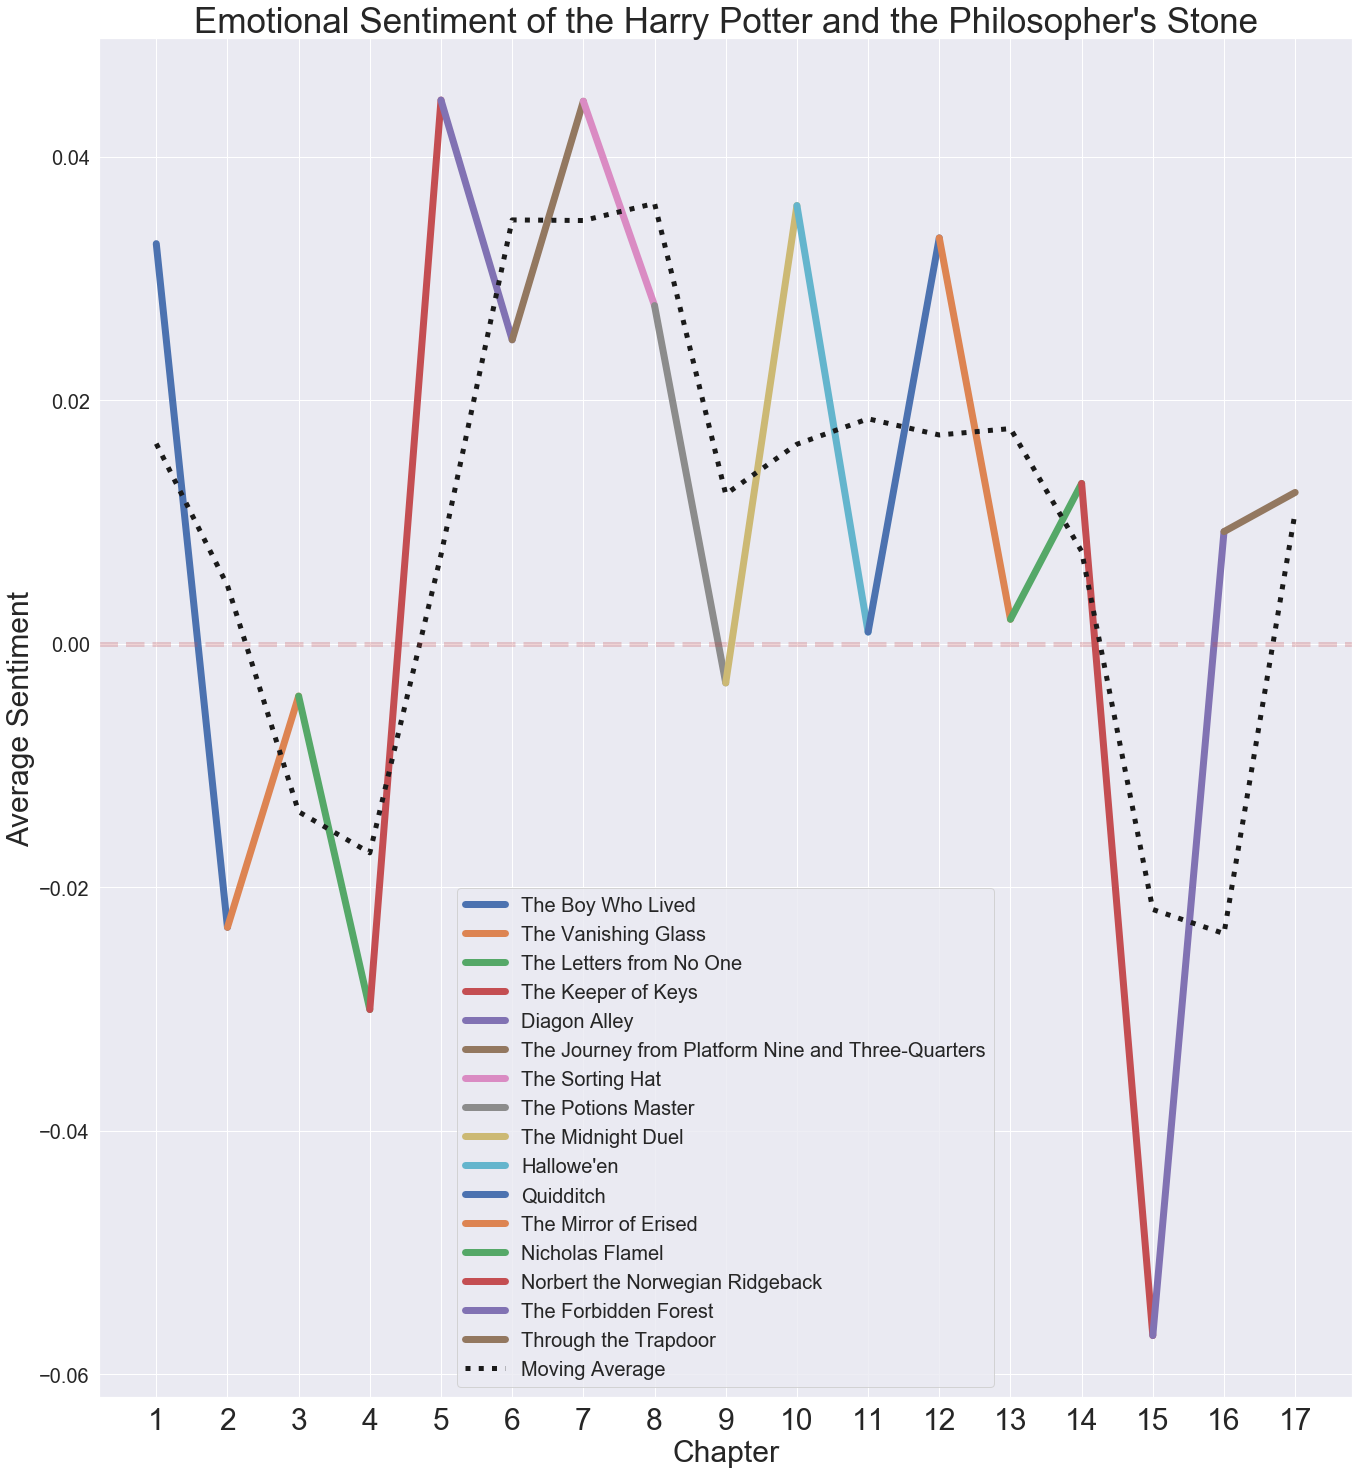

In [297]:


plt.figure(figsize=(20, 25))

for num in list(range(len(test)-1)):
    plt.plot( test.iloc[ [num,num+1] , [1 ]],
             label=chapternames[num], linewidth=7 )
    
plt.plot(movingaverage(y, 2), color='k', linewidth=5, linestyle=':', label = 'Moving Average')
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--', linewidth=5)
plt.legend( fontsize=20)
plt.title("Emotional Sentiment of the Harry Potter and the Philosopher's Stone", fontsize=35)
plt.xlabel('Chapter', fontsize=30)
plt.ylabel('Average Sentiment', fontsize=30)
plt.xticks( list(range(0,17)), list(range(1,18)), fontsize=30)
plt.yticks(fontsize=20)
plt.savefig('HarryPotterBookOne.png')
plt.show()

In [166]:
###############################################################################################################################

                                                # Okay but what if we do sentence by sentence


###############################################################################################################################






BookOne2 = BookOne
sent_sents = []


for chapternum in tqdm(BookOne2, desc='Progress'):
    print(chapternum)
    text =BookOne2[chapternum][1]
    sentence_list = tokenize.sent_tokenize(text)
    chapter_wrapper = []
    #print(sentence_list)
    
    for sentence in sentence_list:
        vs = analyzer.polarity_scores(sentence)
        sentiments = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}
        sentiments['compound'] = vs['compound']
        sentiments['neg'] = vs['neg']
        sentiments['neu'] = vs['neu']
        sentiments['pos'] = vs['pos']
        chapter_wrapper.append(sentiments)
    sent_sents.append(chapter_wrapper)

  

CHAPTER ONE
CHAPTER TWO
CHAPTER THREE
CHAPTER FOUR
CHAPTER FIVE
CHAPTER SIX
CHAPTER SEVEN
CHAPTER EIGHT
CHAPTER NINE
CHAPTER TEN
CHAPTER ELEVEN
CHAPTER TWELVE
CHAPTER THIRTEEN
CHAPTER FOURTEEN
CHAPTER FIFTEEN
CHAPTER SIXTEEN
CHAPTER SEVENTEEN



In [222]:
###############################################################################################################################

                                                # Reformat data


###############################################################################################################################




listofdf=[]
for chapter in sent_sents:
    
    
    chapter3 = []
    for sent in chapter:
        #print(sent['compound'])
        chapter3.append(sent['compound'])
    #book.append(chapter3)
    middlehash = {'Index': list(range(len(chapter3))),
                 'Compound':chapter3}
    newdf = pd.DataFrame(middlehash)
    listofdf.append(newdf)

In [263]:
num = 1
colors = ['darkslateblue','navy', 'blue','darkslategrey','lightslategrey',
          'steelblue','dodgerblue', 'deepskyblue', 'darkturquoise',
        'darkcyan','cyan', 'paleturquoise', 'aquamarine', 'mediumspringgreen',
          'lime', 'limegreen',
         'darkgreen']
for df in listofdf:
    df['Chapter'] = num
    df['Color']= colors[num-1]
    num+=1

In [ ]:
###############################################################################################################################

                                                # Create dataframe


###############################################################################################################################



    

In [288]:
megadf = pd.concat(listofdf)
megadf['NewIndex']=list(range(len(megadf)))
megadf

,Index,Compound,Chapter,Color,NewIndex
0,0,0.8779,1,darkslateblue,0
1,1,-0.5423,1,darkslateblue,1
2,2,0.0000,1,darkslateblue,2
3,3,0.0000,1,darkslateblue,3
4,4,0.4927,1,darkslateblue,4
...,...,...,...,...,...
472,472,0.0000,17,darkgreen,6384
473,473,-0.4388,17,darkgreen,6385
474,474,0.6124,17,darkgreen,6386
475,475,0.0000,17,darkgreen,6387


In [ ]:
###############################################################################################################################

                                                # Gut check


###############################################################################################################################




In [ ]:
for chapter in megadf['Chapter'].unique():
    for index, row in megadf[megadf['Chapter']==chapter][['Compound', 'NewIndex', 'Color']].iterrows():
        print(megadf[megadf['Chapter']==chapter].Color[1])
        print(megadf[megadf['Chapter']==chapter][['Compound', 'NewIndex', 'Color']][index:index+2])
        print(megadf[megadf['Chapter']==chapter].Color[1])    

#megadf[megadf['Chapter']==1][['Compound', 'NewIndex', 'Color']][0:2]

In [393]:
###############################################################################################################################

                                                # Manually name lines to fix formatting


###############################################################################################################################




labels = []
for chapter in megadf['Chapter'].unique():
    value = "Chapter: {}".format(megadf[megadf['Chapter']==chapter]['Chapter'][1])
    labels.append(value)

labels.append('Moving Average')

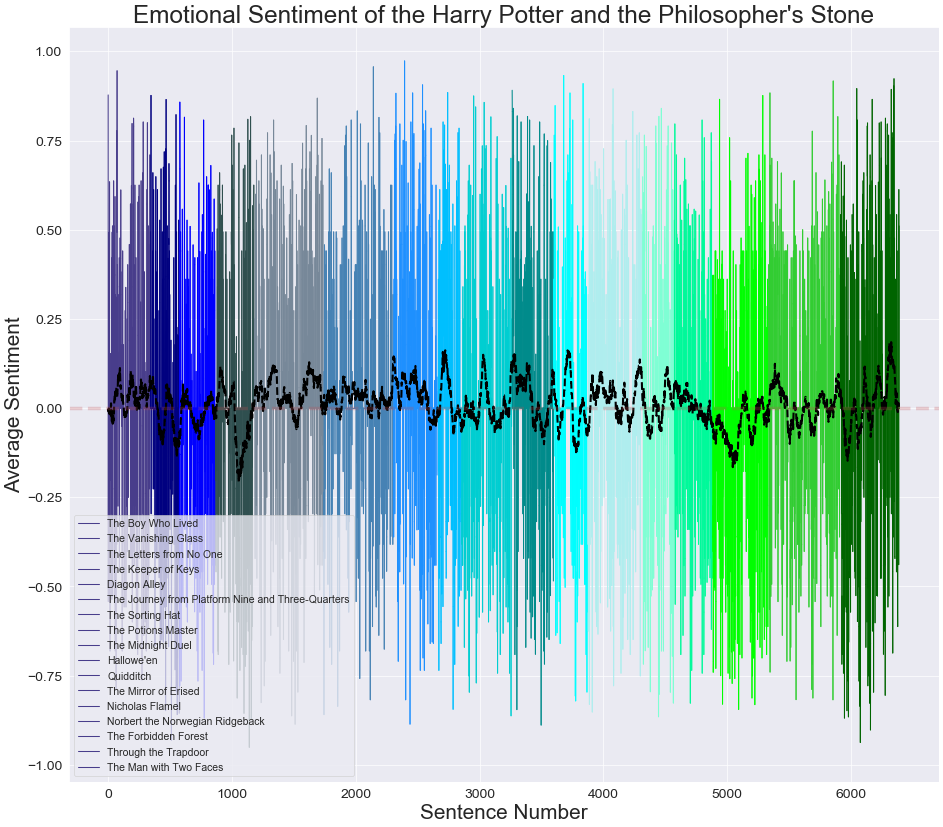

In [422]:
###############################################################################################################################

                                                # Plot


###############################################################################################################################





plt.figure( figsize=(20, 20), frameon=False, dpi=50)



for chapter in megadf['Chapter'].unique():
    color = megadf[megadf['Chapter']==chapter].Color[1]
    #label = labels[chapter]
    for index, row in megadf[megadf['Chapter']==chapter][['Compound', 'NewIndex', 'Color']].iterrows():
        lines =plt.plot(megadf[megadf['Chapter']==chapter][['NewIndex']][index:index+2],
                 megadf[megadf['Chapter']==chapter][['Compound']][index:index+2], 
                 color= color, label=chapternames[chapter-1]
                )
        
leg = ax.get_legend()
leg.legendHandles[0].set_color('red')

plt.plot(movingaverage(megadf['Compound'], 50), color='black',linewidth=3, linestyle='dashed', label = 'Moving Average')
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--' ,linewidth=5)
plt.legend( chapternames,fontsize=15)
plt.title("Emotional Sentiment of the Harry Potter and the Philosopher's Stone", fontsize=35)
plt.xlabel('Sentence Number', fontsize=30)
plt.ylabel('Average Sentiment', fontsize=30)
#plt.xticks( list(range(chapternames)),chapternames, fontsize=10)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('HarryPotterBookOne_Sentences.png')
plt.show()

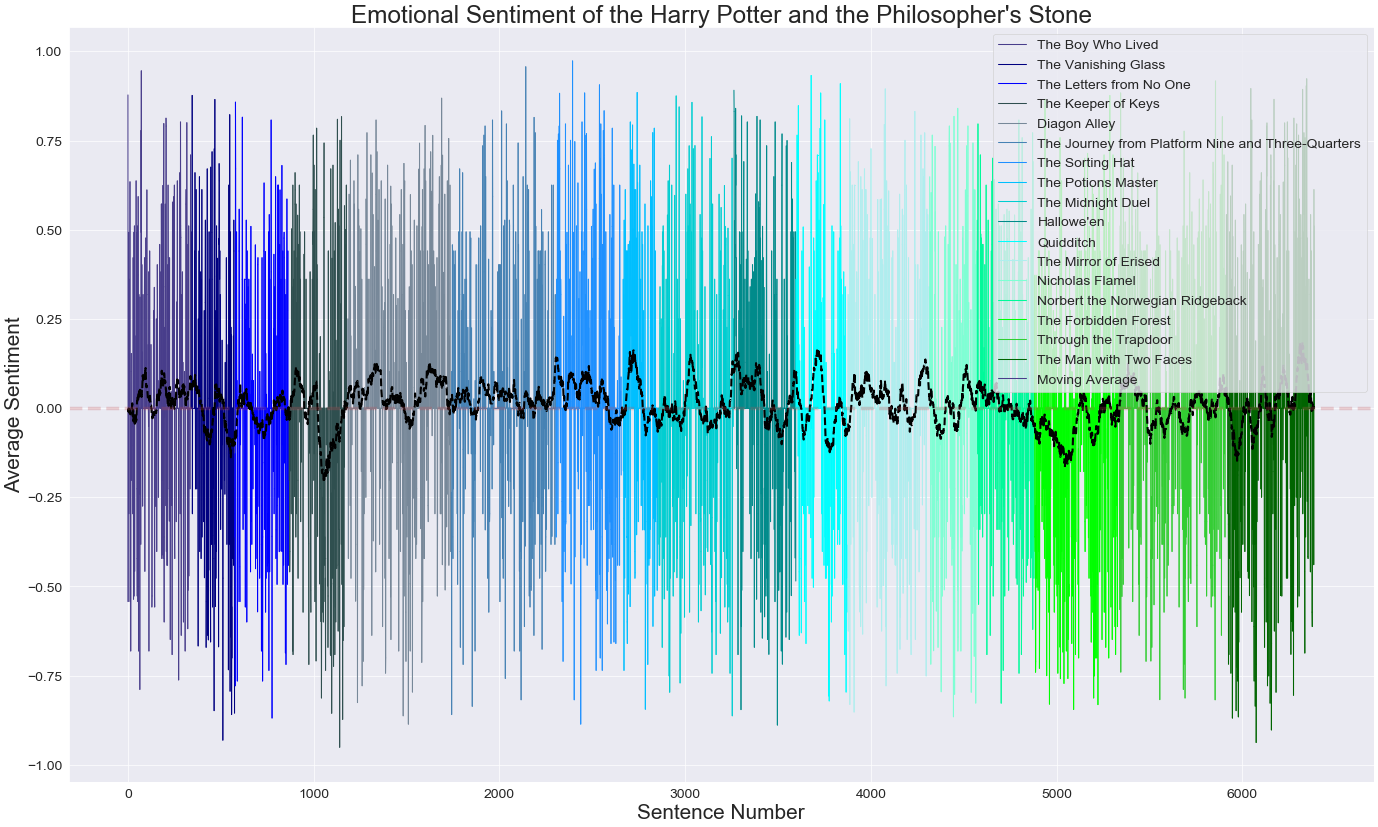

In [437]:
###############################################################################################################################

                                                # Fix color legend manually


###############################################################################################################################










plt.figure( figsize=(30, 20), frameon=False, dpi=50)



for chapter in megadf['Chapter'].unique():
    color = megadf[megadf['Chapter']==chapter].Color[1]
    #label = labels[chapter]
    for index, row in megadf[megadf['Chapter']==chapter][['Compound', 'NewIndex', 'Color']].iterrows():
        lines =plt.plot(megadf[megadf['Chapter']==chapter][['NewIndex']][index:index+2],
                 megadf[megadf['Chapter']==chapter][['Compound']][index:index+2], 
                 color= color, label=chapternames[chapter-1]
                )
        


plt.plot(movingaverage(megadf['Compound'], 50), color='black',linewidth=3, linestyle='dashed', label = 'Moving Average')
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--' ,linewidth=5)
new =chapternames
#new.append('Moving Average')
plt.legend( new[0:18],fontsize=20)
ax = plt.gca()
leg = ax.get_legend()

leg.legendHandles[0].set_color('darkslateblue')
leg.legendHandles[1].set_color('navy')
leg.legendHandles[2].set_color('blue')
leg.legendHandles[3].set_color('darkslategrey')
leg.legendHandles[4].set_color('lightslategrey')
leg.legendHandles[5].set_color('steelblue')
leg.legendHandles[6].set_color('dodgerblue')
leg.legendHandles[7].set_color('deepskyblue')
leg.legendHandles[8].set_color('darkturquoise')
leg.legendHandles[9].set_color('darkcyan')
leg.legendHandles[10].set_color('cyan')
leg.legendHandles[11].set_color('paleturquoise')
leg.legendHandles[12].set_color('aquamarine')
leg.legendHandles[13].set_color('mediumspringgreen')
leg.legendHandles[14].set_color('lime')
leg.legendHandles[15].set_color('limegreen')
leg.legendHandles[16].set_color('darkgreen')



plt.title("Emotional Sentiment of the Harry Potter and the Philosopher's Stone", fontsize=35)
plt.xlabel('Sentence Number', fontsize=30)
plt.ylabel('Average Sentiment', fontsize=30)
#plt.xticks( list(range(chapternames)),chapternames, fontsize=10)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('HarryPotterBookOne_Sentences_large.png')
plt.show()




